In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [19]:
df = pd.read_csv("social_network_ads.csv")

In [20]:
print(df.head())

   Age  EstimatedSalary  Purchased
0   18            99355          0
1   21           114938          0
2   21            81509          0
3   57            39777          0
4   27           140311          0


In [21]:
print(df.describe())

              Age  EstimatedSalary   Purchased
count  100.000000        100.00000  100.000000
mean    37.890000      86578.59000    0.530000
std     13.222948      38310.20677    0.501614
min     18.000000      15469.00000    0.000000
25%     27.000000      52042.25000    0.000000
50%     37.000000      91677.50000    1.000000
75%     50.500000     118507.00000    1.000000
max     59.000000     148847.00000    1.000000


In [22]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              100 non-null    int64
 1   EstimatedSalary  100 non-null    int64
 2   Purchased        100 non-null    int64
dtypes: int64(3)
memory usage: 2.5 KB
None


In [23]:
print(df["Purchased"].value_counts())

Purchased
1    53
0    47
Name: count, dtype: int64


#### visualize the data

Text(0.5, 1.0, 'coutomer purchase behavior')

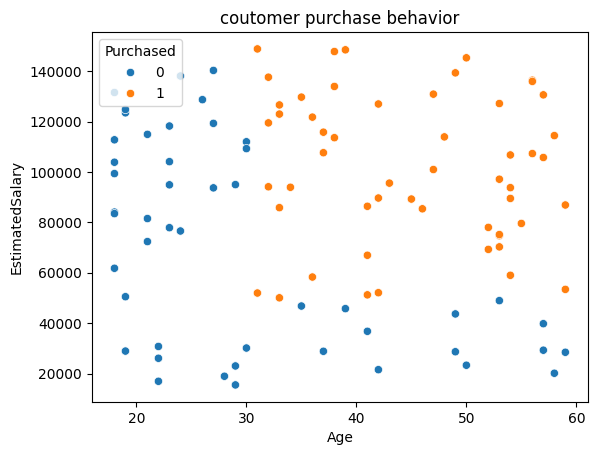

In [24]:
sns.scatterplot(x = "Age", y = "EstimatedSalary", hue = "Purchased",data = df)
plt.title("coutomer purchase behavior")

#### feature scaling

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(df[["Age", "EstimatedSalary"]])
y = df["Purchased"]


#### train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### train logistic regression model

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


#### make prediction

In [32]:
y_pred = model.predict(X_test)

#### model evaluation

In [33]:
print(accuracy_score(y_test, y_pred))

0.75


In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.75      0.82      0.78        11

    accuracy                           0.75        20
   macro avg       0.75      0.74      0.74        20
weighted avg       0.75      0.75      0.75        20



#### confusion matrix

<Axes: >

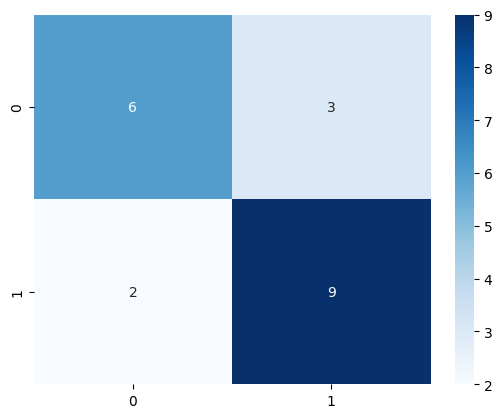

In [35]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm , annot = True, fmt = "d", cmap = "Blues")

#### 